P_bar: 0.0
Classical Slope phi0: 0.000000
Classical Slope phi1: 0.000000
Classical Slope phi2: 0.000000
Classical Slope phi3: 0.000000
Classical Slope phi4: 0.000000
Classical Slope phi5: 0.000000
Classical Slope phi6: 0.000000

P_bar: 0.1
Classical Slope phi0: 0.000000
Classical Slope phi1: 0.015267
Classical Slope phi2: 0.027756
Classical Slope phi3: 0.037468
Classical Slope phi4: 0.044405
Classical Slope phi5: 0.048567
Classical Slope phi6: 0.049954

P_bar: 0.2
Classical Slope phi0: 0.000000
Classical Slope phi1: 0.030467
Classical Slope phi2: 0.055382
Classical Slope phi3: 0.074749
Classical Slope phi4: 0.088576
Classical Slope phi5: 0.096870
Classical Slope phi6: 0.099634

P_bar: 0.3
Classical Slope phi0: 0.000000
Classical Slope phi1: 0.045538
Classical Slope phi2: 0.082752
Classical Slope phi3: 0.111661
Classical Slope phi4: 0.132288
Classical Slope phi5: 0.144655
Classical Slope phi6: 0.148776

P_bar: 0.4
Classical Slope phi0: 0.000000
Classical Slope phi1: 0.060421
Classical S

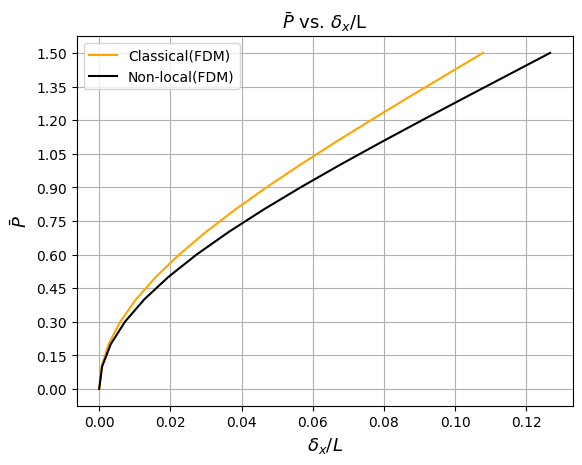

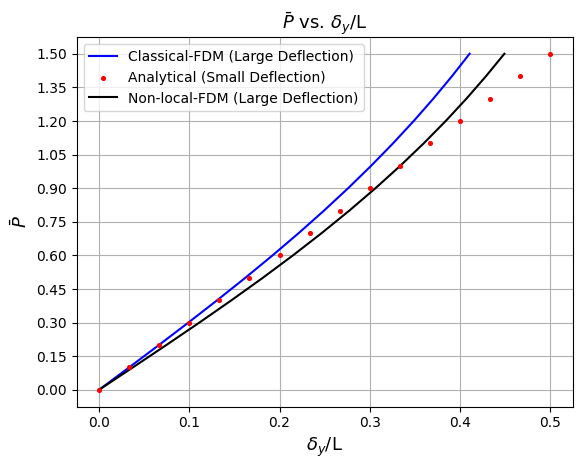

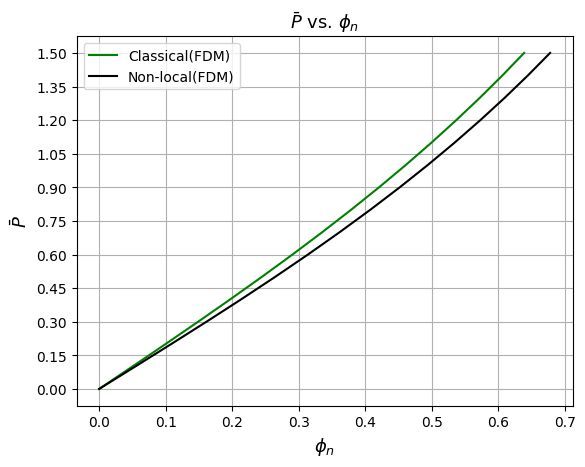

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

#P_bar = (P*(L**2))/(E*I)

# Change the value of n here #keep the number of nodes value 'n' as "odd"
m = 7  #(0 to i=n-1)
delta_s_bar = 1 / (m-1) #non-dimensional


# Vary P_bar from 0 to 1 with step size 0.05 and store the values in a list
P_bar_values = np.round(np.arange(0, 1.51, 0.1),2)


A_values = []  # List to store the corresponding A values
classical_slopes = []  # List to store the classical slope for each value of P_bar
non_local_slopes = []  # List to store the non-local slope for each value of P_bar


# Calculate corresponding A values and classical solutions
for P_bar in P_bar_values:
    A = P_bar * ((delta_s_bar) ** 2)
    A_values.append(A)



    def non_local(A, a, b):
      def F(x):
        m = len(x)
        x[0], x[1], x[2], *_, x[m-1] = x
        f = [0] * m

        f[0] = x[0]
        f[1] = (a - 2*b) * x[0] - (2*a - 3*b) * x[1] + (a - 2*b) * x[2] + b*x[3] + A * np.cos(x[1])

        for i in range(2, m-2):
            f[i] = b * x[i-2] + (a - 2*b) * x[i-1] - (2*a - 2*b) * x[i] + (a - 2*b) * x[i+1] + b*x[i+2] + A * np.cos(x[i])

        f[m-2] = b * x[m-4] + (a - 2*b) * x[m-3] - (2*a - 3*b) * x[m-2] + (a - 2*b) * x[m-1] + A * np.cos(x[m-2])
        f[m-1] = (3*b/2) * x[m-3] + (2*a - 2*b) * x[m-2] - (2*a - (b/2)) * x[m-1] + A * np.cos(x[m-1])


        f = np.array(f)
        #print("Non-local f matrix:")
        #print(f)
        return f

      def Jacobian(x):
        m = len(x)
        x[0], x[1], x[2], *_, x[m-1] = x
        J = np.zeros([m, m])


        J[0, 0] = 1


        J[1, 0] = a - 2*b
        J[1, 1] = -(2*a - 3*b) - A * np.sin(x[1])
        J[1, 2] = a - 2*b
        J[1, 3] = b




        for j in range(2, m-2):
            J[j, j-2] = b
            J[j, j-1] = a - 2*b
            J[j, j] = -(2*a - 2*b) - A * np.sin(x[j])
            J[j, j+1] = a - 2*b
            J[j, j+2] = b


        J[m-2, m-4] = b
        J[m-2, m-3] = a - 2*b
        J[m-2, m-2] = -(2*a - 3*b) - A * np.sin(x[m-2])
        J[m-2, m-1] = a - 2*b


        J[m-1, m-3] = (3*b/2)
        J[m-1, m-2] = (2*a - 2*b)
        J[m-1, m-1] = -(2*a - (b/2)) - A * np.sin(x[m-1])




        J = np.array(J)
        #print("Non-local Jacobian matrix:")
        #print(J)
        return J


      x_guess = np.zeros(m)
      f_values = F(x_guess)
      J_matrix = Jacobian(x_guess)


      def newton_raphson(F, Jacobian, x_guess, max_iter=100, tolerance=1e-6):
        x = x_guess
        for _ in range(max_iter):
            delta_x = np.linalg.solve(Jacobian(x), -F(x))
            x = x + delta_x
            if np.linalg.norm(delta_x) < tolerance:
                break

        return x

      return newton_raphson(F, Jacobian, x_guess)


    solution1 = non_local(A, a=1, b=0)
    solution2 = non_local(A, a=0.8, b=0.1)
    classical_slopes.append(solution1)
    non_local_slopes.append(solution2)



# Print the classical solutions for each value of P_bar
for i, result in enumerate(classical_slopes):
    print(f"P_bar: {P_bar_values[i]}")
    for j, slope in enumerate(result):
        print(f"Classical Slope phi{j}: {slope:.6f}")
    print()  # Add a blank line for better readability between each P_bar value




# Print the non-local solutions for each value of P_bar
for i, result in enumerate(non_local_slopes):
    print(f"P_bar: {P_bar_values[i]}")
    for j, slope in enumerate(result):
        print(f"Non-local Slope phi{j}: {slope:.6f}")
    print()  # Add a blank line for better readability between each P_bar value



#vertical deflection  and horizontal deflection calculated from the slope values

upper_limit = 1
lower_limit = 0

def F_sin(x):
    return math.sin(x)

def F_cos(x):
    return math.cos(x)


def simpsons_rule_integration(F_values):
    n = m - 1
    h = (upper_limit - lower_limit) / n
    R = np.zeros(m)
    R[0] = 0
    R[1] = (h / 2) * (F_values[0] + F_values[1])

    for i in range(2, m):
        R[i] = ((F_values[0] + F_values[i]) + (4 * np.sum(F_values[1:i:2])) + (2 * np.sum(F_values[2:i:2])))

        R[i] *= (h / 3)

    return R

# Calculate and print horizontal deflection for each value of P_bar
for i, result in enumerate(classical_slopes):
    F1_cos_values = np.array([F_cos(x_val) for x_val in result])
    x1_values = 1 - (simpsons_rule_integration(F1_cos_values))

    print(f"P_bar: {P_bar_values[i]}")
    for j, x_val in enumerate(x1_values):
        print(f"(Classical)Horizontal Deflection x[{j}] = {x_val:.6f}")
    print()  # Add a blank line for better readability between each P_bar value

for i, result in enumerate(non_local_slopes):
    F2_cos_values = np.array([F_cos(x_val) for x_val in result])
    x2_values = 1 - (simpsons_rule_integration(F2_cos_values))

    print(f"P_bar: {P_bar_values[i]}")
    for j, x_val in enumerate(x2_values):
        print(f"(Non-local)Horizontal Deflection x[{j}] = {x_val:.6f}")
    print()  # Add a blank line for better readability between each P_bar value

# Calculate and print vertical deflection for each value of P_bar
for i, result in enumerate(classical_slopes):
    F1_sin_values = np.array([F_sin(x_val) for x_val in result])
    y1_values = simpsons_rule_integration(F1_sin_values)

    print(f"P_bar: {P_bar_values[i]}")
    for j, y_val in enumerate(y1_values):
        print(f"(Classical)Vertical Deflection y[{j}] = {y_val:.6f}")
    print()  # Add a blank line for better readability between each P_bar value


for i, result in enumerate(non_local_slopes):
    F2_sin_values = np.array([F_sin(x_val) for x_val in result])
    y2_values = simpsons_rule_integration(F2_sin_values)

    print(f"P_bar: {P_bar_values[i]}")
    for j, y_val in enumerate(y2_values):
        print(f"(Non-local)Vertical Deflection y[{j}] = {y_val:.6f}")
    print()  # Add a blank line for better readability between each P_bar value


# Calculate the last phi values for all P_bar values
last_phi1_values = []  # List to store the last phi values
for result in classical_slopes:
    last_phi1_values.append(result[-1])  # Append the last phi value to the list


# Calculate the last phi values for all P_bar values
last_phi2_values = []  # List to store the last phi values
for result in non_local_slopes:
    last_phi2_values.append(result[-1])  # Append the last phi value to the list


# Print the last phi values for all P_bar values
print("(Classical)Last phi values:")
for i, phi_val in enumerate(last_phi1_values):
    print(f"P_bar: {P_bar_values[i]} - Last phi: {phi_val:.6f}")
print()


print("(Non-local)Last phi values:")
for i, phi_val in enumerate(last_phi2_values):
    print(f"P_bar: {P_bar_values[i]} - Last phi: {phi_val:.6f}")
print()


last_x1_values = []  # List to store the last x[n-1] values
for i, result in enumerate(classical_slopes):
    F1_cos_values = np.array([F_cos(x_val) for x_val in result])
    x1_values = 1 - simpsons_rule_integration(F1_cos_values)
    last_x1_values.append(x1_values[-1])  # Append the last value x[n-1] to the list

last_x2_values = []  # List to store the last x[n-1] values
for i, result in enumerate(non_local_slopes):
    F2_cos_values = np.array([F_cos(x_val) for x_val in result])
    x2_values = 1 - simpsons_rule_integration(F2_cos_values)
    last_x2_values.append(x2_values[-1])  # Append the last value x[n-1] to the list

# Print the last x[n-1] values for all P_bar values
print("(Classical)Last x[n-1] values:")
for i, x_val in enumerate(last_x1_values):
    print(f"P_bar: {P_bar_values[i]} - x = {x_val:.6f}")
print()

print("(Non-local)Last x[n-1] values:")
for i, x_val in enumerate(last_x2_values):
    print(f"P_bar: {P_bar_values[i]} - x = {x_val:.6f}")
print()

last_y1_values = []  # List to store the last y[n-1] values
for i, result in enumerate(classical_slopes):
    F1_sin_values = np.array([F_sin(x_val) for x_val in result])
    y1_values = simpsons_rule_integration(F1_sin_values)
    last_y1_values.append(y1_values[-1])  # Append the last value y[n-1] to the list

last_y2_values = []  # List to store the last y[n-1] values
for i, result in enumerate(non_local_slopes):
    F2_sin_values = np.array([F_sin(x_val) for x_val in result])
    y2_values = simpsons_rule_integration(F2_sin_values)
    last_y2_values.append(y2_values[-1])  # Append the last value y[n-1] to the list

# Print the last y[n-1] values for all P_bar values
print("(Classical)Last y[n-1] values:")
for i, y_val in enumerate(last_y1_values):
    print(f"P_bar: {P_bar_values[i]} - y = {y_val:.6f}")
print()

# Print the last y[n-1] values for all P_bar values
print("(Non-local)Last y[n-1] values:")
for i, y_val in enumerate(last_y2_values):
    print(f"P_bar: {P_bar_values[i]} - y = {y_val:.6f}")
print()


# Analytical Method- Non-dimensional vertical Deflection
x = np.linspace(0,1,m)
y = (P_bar/2)*((x**2) - ((x**3)/3))

last_y_values = []   # List to store the last y[n-1] values
for P_bar in P_bar_values:
  y_analytical = (P_bar/2)*((x**2) - ((x**3)/3))
  last_y_values.append(y_analytical[-1])

# Create a pandas DataFrame to store the data in a CSV file
data = {'P_bar': P_bar_values,
        'Max. Vertical Deflection(Classical)': last_y1_values,
        'Max. Vertical Deflection(Analytical)': last_y_values,
        'Max. Vertical Deflection(Non-local)': last_y2_values,
        'Max. Horizontal Deflection(Classical)': last_x1_values,
        'Max. Horizontal Deflection(Non-local)': last_x2_values,
        'Max.Slope(Classical)': last_phi1_values,
        'Max.Slope(Non-local)': last_phi2_values}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('P_bar,MAX_vertical_deflection,horizontal_deflection,slope.csv', index=False)


font_size = 13
t=np.linspace(0,1.5,11)
# Plot P_bar values vs corresponding x[n-1] values
plt.figure()
plt.yticks(t)
plt.plot(last_x1_values,P_bar_values, color='orange',linewidth=1.5,label='Classical(FDM)')
plt.plot(last_x2_values,P_bar_values, color='black',linewidth=1.5,label='Non-local(FDM)')
plt.xlabel(r'$\delta_x/L$', fontsize=font_size)
plt.ylabel(r'$\bar{P}$', fontsize=font_size)
plt.title(r'$\bar{P}$ vs. $\delta_x$/L', fontsize=font_size)
plt.legend()
plt.grid('true')
plt.savefig('P_bar_VS_x.pdf')
plt.show()




# Plot P_bar values vs corresponding y[n-1] values
plt.figure()
plt.yticks(t)
plt.plot(last_y1_values,P_bar_values,color='blue',linewidth=1.5,label='Classical-FDM (Large Deflection)')
plt.scatter(last_y_values,P_bar_values, color = 'red', s=7,zorder=3, label ='Analytical (Small Deflection)')
plt.plot(last_y2_values,P_bar_values, color='black',linewidth=1.5,label='Non-local-FDM (Large Deflection)')
plt.xlabel(r'$\delta_y$/L', fontsize=font_size)
plt.ylabel(r'$\bar{P}$', fontsize=font_size)
plt.title(r'$\bar{P}$ vs. $\delta_y$/L', fontsize=font_size)
plt.legend()
plt.grid('true')
plt.savefig('P_bar_VS_y.pdf')
plt.show()




# Plot P_bar values vs corresponding phi[n-1] values
plt.figure()
plt.yticks(t)
plt.plot(last_phi1_values,P_bar_values, color='green',linewidth=1.5,label='Classical(FDM)')
plt.plot(last_phi2_values,P_bar_values, color='black',linewidth=1.5,label='Non-local(FDM)')
plt.xlabel(r'$\phi_n$', fontsize=font_size)
plt.ylabel(r'$\bar{P}$', fontsize=font_size)
plt.title(r'$\bar{P}$ vs. $\phi_n$', fontsize=font_size)
plt.grid('true')
plt.legend()
plt.savefig('P_bar_VS_Slope.pdf')
plt.show()
